
거래 시장 분포:
market
KRW-HBAR    4563
KRW-WLD     4082
KRW-XRP     3969
KRW-F       1775
KRW-XPR     1733
Name: count, dtype: int64

주문 상태(state) 분포:
state
wait      11827
cancel    10830
done       7831
trade      3130
Name: count, dtype: int64


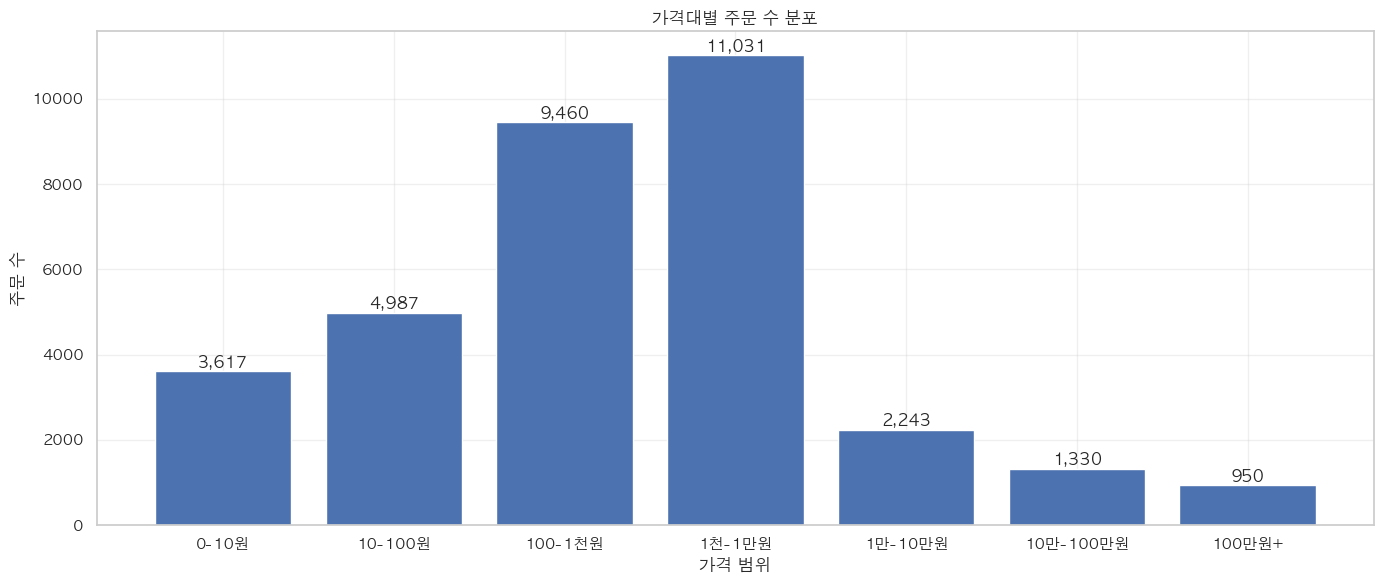

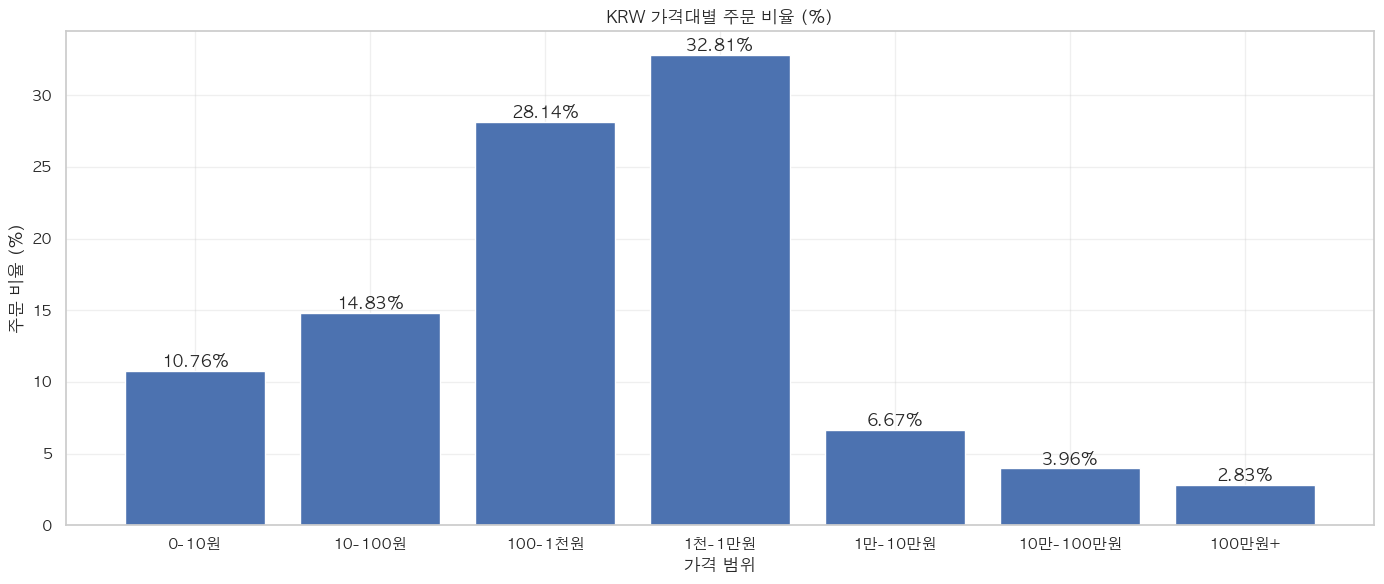


통화별 평균 가격:
currency
KRW    3,350,767.72
Name: price, dtype: object

데이터 통계 요약:
                id        price    volume  remaining_volume  reserved_fee  remaining_fee  paid_fee  locked  executed_volume  calculated_volume  trades_count   userId  krw_balance  coin_balance  avg_buy_price  current_price  best_bid_price  best_ask_price  change_rate_24h  volume_24h   rsi_14  bollinger_band_upper  bollinger_band_lower  bollinger_band_middle  stochastic_k  stochastic_d        ema_5       ema_10     atr_5
count     33618.00     33618.00  33618.00          33618.00      33618.00       33618.00  33618.00  304.00         33618.00               0.00      33618.00 33617.00     33313.00      33313.00       33313.00       33313.00        33313.00        33313.00         33313.00    33313.00 33313.00              33313.00              33313.00               33313.00      33313.00      33313.00     33313.00     33313.00  33313.00
mean  845002845.64   3350767.72   9630.15           8808.99        816.0

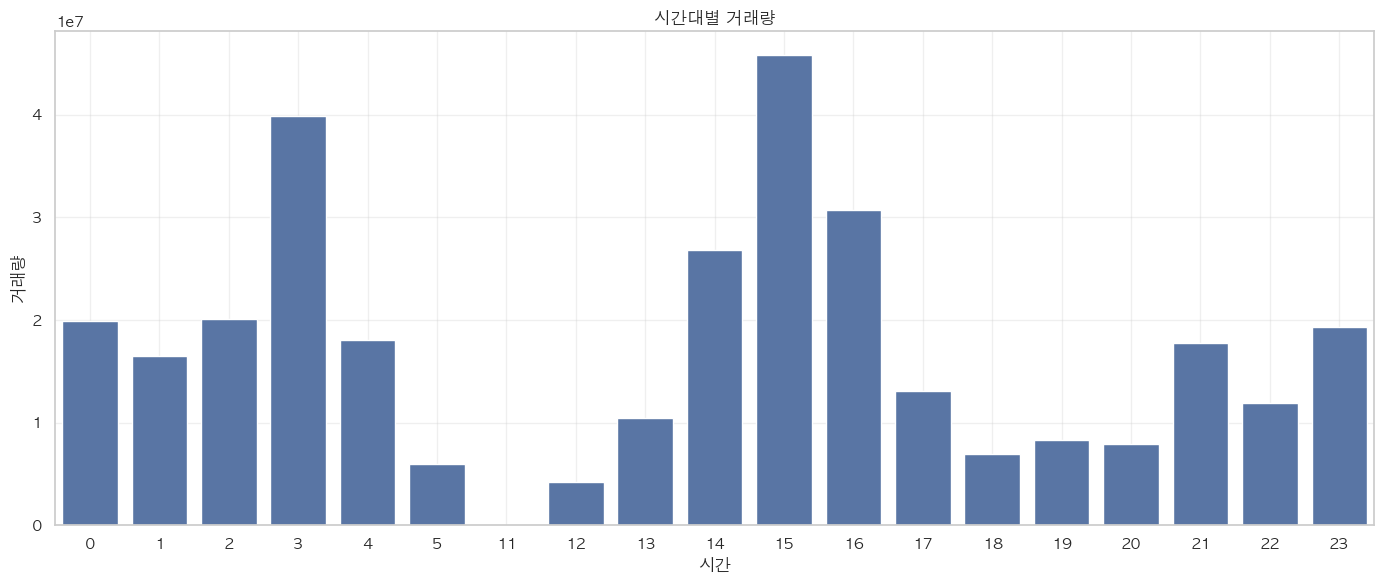

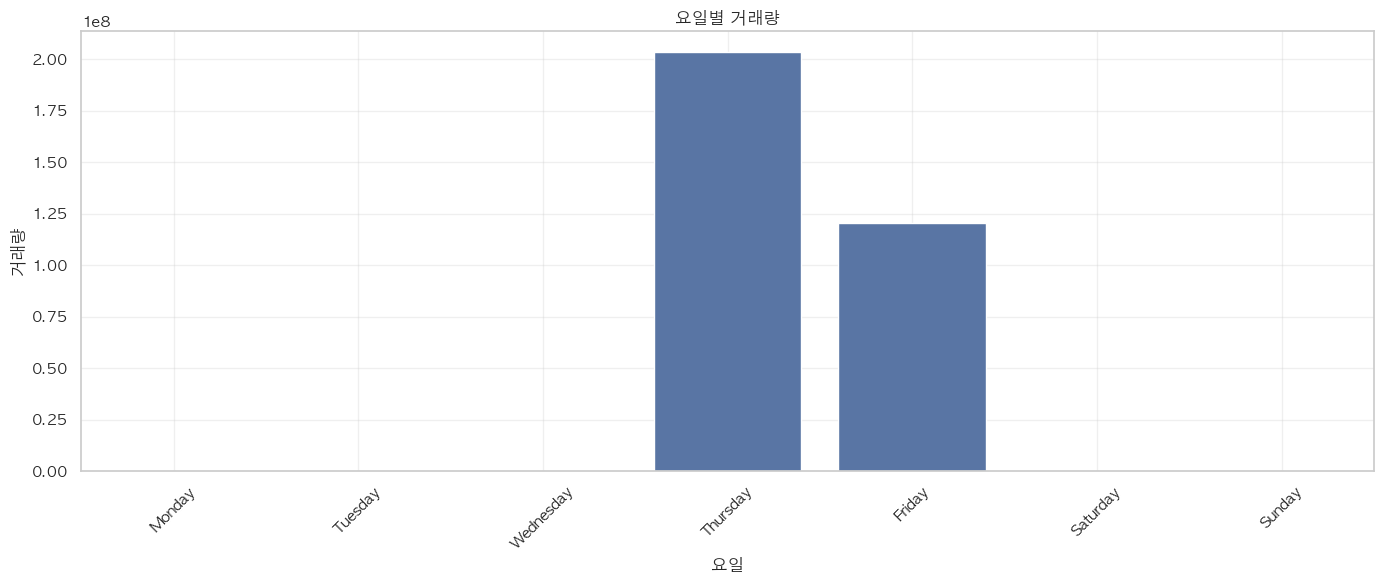

매수/매도 분포:
side
ask    17810
bid    15808
Name: count, dtype: int64

매수/매도별 평균 가격 및 거래량:
          price   volume
side                    
ask  2929793.83  9088.42
bid  3825055.74 10240.50


<Figure size 1400x600 with 0 Axes>

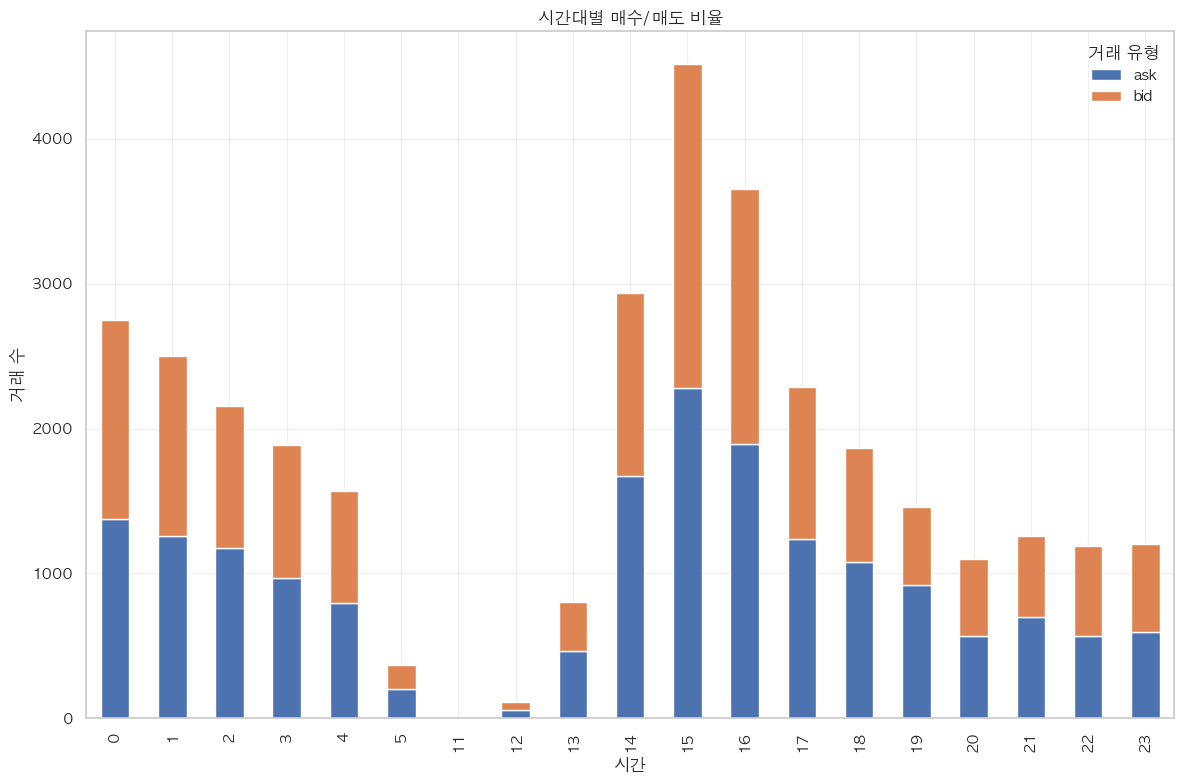


주문 유형 분포:
ord_type
limit    33618
Name: count, dtype: int64


/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/504391178.py:210: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_side_dist = df.groupby(['price_range', 'side']).size().unstack(fill_value=0)


<Figure size 1400x600 with 0 Axes>

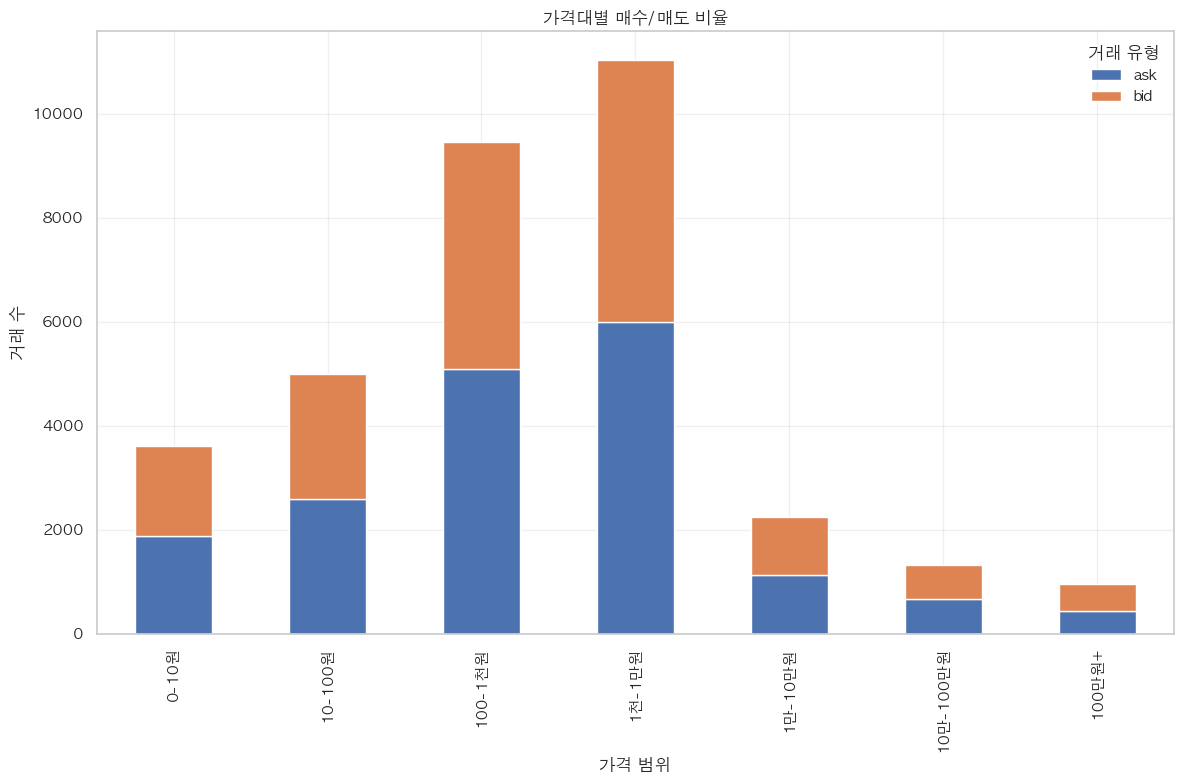

<Figure size 1400x600 with 0 Axes>

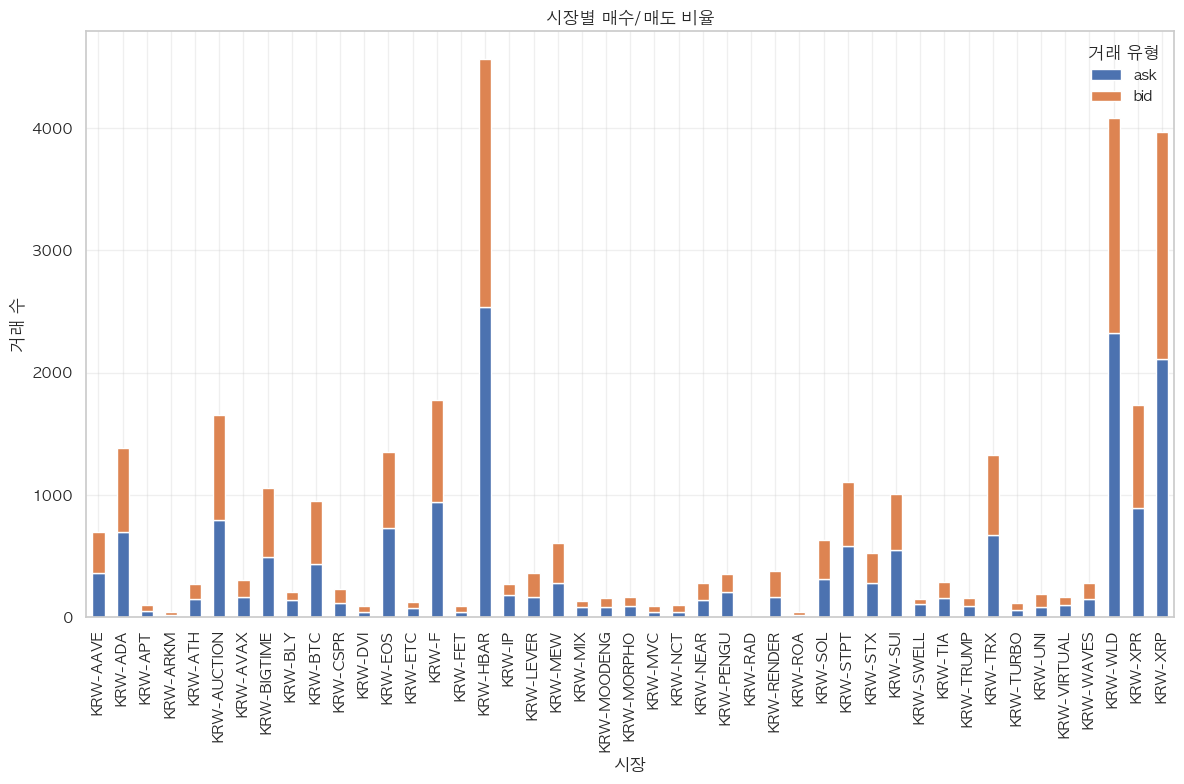

<Figure size 1400x600 with 0 Axes>

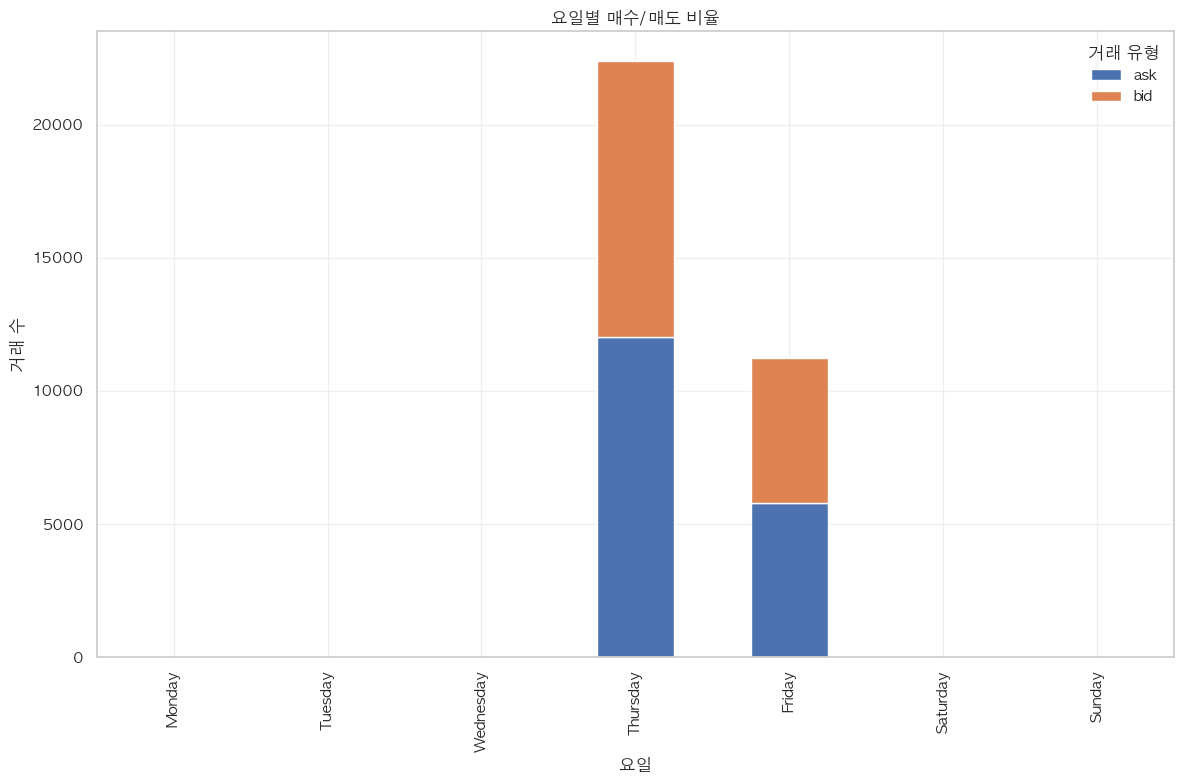

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = '../data/raw/account1_orders_100000.csv'  # 상대 경로 사용

## 오류 처리를 위한 옵션 추가
try:
    # 방법 1: 오류 행 무시
    df = pd.read_csv(file_path, on_bad_lines='skip')
except:
    # 대체 방법: 인용 처리 방식 변경
    df = pd.read_csv(file_path, quoting=3)  # QUOTE_NONE 옵션 사용

# 시각화 설정 (수정된 부분)
plt.style.use('seaborn-v0_8-whitegrid')  # 올바른 스타일 이름 사용
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(style="whitegrid")

# 한글 폰트 설정
import matplotlib.font_manager as fm

# 맥OS에서 사용 가능한 한글 폰트 찾기
# 아래 중 하나를 선택하세요
try:
    # 방법 1: AppleGothic 사용
    plt.rc('font', family='AppleGothic')
except:
    try:
        # 방법 2: 나눔고딕 사용 (설치된 경우)
        path = '/Library/Fonts/NanumGothic.ttf'  # 나눔고딕 경로
        font_name = fm.FontProperties(fname=path).get_name()
        plt.rc('font', family=font_name)
    except:
        # 방법 3: 기본 폰트 사용하고 경고만 숨기기
        import warnings
        warnings.filterwarnings('ignore', category=UserWarning)
        print("한글 폰트를 찾을 수 없습니다. 경고 메시지를 숨깁니다.")

# 음수 표시 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 숫자 형식 지정 및 통화 표시 개선
pd.set_option('display.float_format', '{:.2f}'.format)  # 소수점 2자리로 제한

# 가격 데이터에 통화 단위 추가 (시각화용)
# 시장(market) 컬럼에서 기준 통화 추출
df['currency'] = df['market'].str.split('-').str[0]
print("\n거래 시장 분포:")
print(df['market'].value_counts().head())

# 데이터 시각화 - 주문 상태 분포
print("\n주문 상태(state) 분포:")
state_counts = df['state'].value_counts()
print(state_counts)

# 판다스 출력 설정 변경
pd.set_option('display.max_columns', None)  # 모든 컬럼 표시
pd.set_option('display.width', 1000)        # 출력 너비 확장


# 통화별 가격 분포 시각화
currencies = df['currency'].unique()

for currency in currencies:
    currency_data = df[df['currency'] == currency]
    
    # 가격대별 분포 확인 (한국어 단위 사용)
    price_ranges = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    price_labels = ['0-10원', '10-100원', '100-1천원', '1천-1만원', '1만-10만원', '10만-100만원', '100만원+']

    # 가격대별 주문 수 계산
    price_distribution = pd.cut(df['price'], bins=price_ranges).value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    bars = plt.bar(price_labels, price_distribution)
    plt.title('가격대별 주문 수 분포')
    plt.xlabel('가격 범위')
    plt.ylabel('주문 수')
    plt.grid(True, alpha=0.3)

    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height):,}',
                ha='center', va='bottom', rotation=0)

    plt.tight_layout()
    plt.show()
    
    # 가격대별 분포 (퍼센트로 표시)
    total_orders = len(currency_data)
    percent_distribution = (price_distribution / total_orders * 100).round(2)
    
    plt.figure(figsize=(14, 6))
    bars = plt.bar(price_labels, percent_distribution)
    plt.title(f'{currency} 가격대별 주문 비율 (%)')
    plt.xlabel('가격 범위')
    plt.ylabel('주문 비율 (%)')
    plt.grid(True, alpha=0.3)
    
    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height:.2f}%',
                 ha='center', va='bottom', rotation=0)
    
    plt.tight_layout()
    plt.show()

# 통화별 평균 가격 비교
avg_price_by_currency = df.groupby('currency')['price'].mean().sort_values(ascending=False)
print("\n통화별 평균 가격:")
print(avg_price_by_currency.apply(lambda x: f"{x:,.2f}"))

# 또는 다음과 같이 추가 분석 코드로 대체
print("\n데이터 통계 요약:")
print(df.describe())

# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())

# 시간 데이터 변환 및 분석
# 1. 원본 데이터 확인
print("원본 날짜 데이터 샘플:", df['created_at'].iloc[0])

# 2. 따옴표 제거
df['created_at'] = df['created_at'].astype(str).str.replace('"', '')

# 3. 결과 확인
print("따옴표 제거 후 날짜 데이터 샘플:", df['created_at'].iloc[0])

# 4. 날짜 변환
df['created_at'] = pd.to_datetime(df['created_at'])

# 5. 시간/일/요일 컬럼 추가
df['hour'] = df['created_at'].dt.hour
df['day'] = df['created_at'].dt.day
df['weekday'] = df['created_at'].dt.day_name()

# 6. 시간대별 거래량 시각화
plt.figure(figsize=(14, 6))
hourly_volume = df.groupby('hour')['volume'].sum()
sns.barplot(x=hourly_volume.index, y=hourly_volume.values)
plt.title('시간대별 거래량')
plt.xlabel('시간')
plt.ylabel('거래량')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. 요일별 거래량 시각화
plt.figure(figsize=(14, 6))
weekday_volume = df.groupby('weekday')['volume'].sum()
# 요일 순서대로 정렬
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_volume = weekday_volume.reindex(weekday_order)
sns.barplot(x=weekday_volume.index, y=weekday_volume.values)
plt.title('요일별 거래량')
plt.xlabel('요일')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 매수/매도 정보 확인
if 'side' in df.columns:
    print("매수/매도 분포:")
    print(df['side'].value_counts())
    
    # 매수/매도별 평균 가격 및 거래량
    print("\n매수/매도별 평균 가격 및 거래량:")
    print(df.groupby('side')[['price', 'volume']].mean())
    
    # 시간대별 매수/매도 비율
    if 'created_at' in df.columns and pd.api.types.is_datetime64_any_dtype(df['created_at']):
        df['hour'] = df['created_at'].dt.hour
        hourly_side = df.groupby(['hour', 'side']).size().unstack(fill_value=0)
        
        plt.figure(figsize=(14, 6))
        hourly_side.plot(kind='bar', stacked=True)
        plt.title('시간대별 매수/매도 비율')
        plt.xlabel('시간')
        plt.ylabel('거래 수')
        plt.grid(True, alpha=0.3)
        plt.legend(title='거래 유형')
        plt.tight_layout()
        plt.show()
else:
    print("매수/매도 정보(side)가 데이터에 없습니다.")
    
# 주문 유형 확인
if 'ord_type' in df.columns:
    print("\n주문 유형 분포:")
    print(df['ord_type'].value_counts())

# 매수/매도 패턴 심층 분석
if 'side' in df.columns:
    # 1. 가격대별 매수/매도 비율
    price_ranges = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    price_labels = ['0-10원', '10-100원', '100-1천원', '1천-1만원', '1만-10만원', '10만-100만원', '100만원+']
    
    df['price_range'] = pd.cut(df['price'], bins=price_ranges, labels=price_labels)
    price_side_dist = df.groupby(['price_range', 'side']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(14, 6))
    price_side_dist.plot(kind='bar', stacked=True)
    plt.title('가격대별 매수/매도 비율')
    plt.xlabel('가격 범위')
    plt.ylabel('거래 수')
    plt.grid(True, alpha=0.3)
    plt.legend(title='거래 유형')
    plt.tight_layout()
    plt.show()
    
    # 2. 시장별 매수/매도 비율
    if 'market' in df.columns:
        market_side_dist = df.groupby(['market', 'side']).size().unstack(fill_value=0)
        
        plt.figure(figsize=(14, 6))
        market_side_dist.plot(kind='bar', stacked=True)
        plt.title('시장별 매수/매도 비율')
        plt.xlabel('시장')
        plt.ylabel('거래 수')
        plt.grid(True, alpha=0.3)
        plt.legend(title='거래 유형')
        plt.tight_layout()
        plt.show()
    
    # 3. 요일별 매수/매도 비율
    if 'created_at' in df.columns and pd.api.types.is_datetime64_any_dtype(df['created_at']):
        df['weekday'] = df['created_at'].dt.day_name()
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        weekday_side_dist = df.groupby(['weekday', 'side']).size().unstack(fill_value=0)
        weekday_side_dist = weekday_side_dist.reindex(weekday_order)
        
        plt.figure(figsize=(14, 6))
        weekday_side_dist.plot(kind='bar', stacked=True)
        plt.title('요일별 매수/매도 비율')
        plt.xlabel('요일')
        plt.ylabel('거래 수')
        plt.grid(True, alpha=0.3)
        plt.legend(title='거래 유형')
        plt.tight_layout()
        plt.show()



In [25]:
def check_trading_data_quality(df):
    quality_report = {}
    
    # 1. 필수 컬럼 존재 확인
    required_columns = ['market', 'created_at', 'price', 'volume', 'side', 'state']
    missing_columns = [col for col in required_columns if col not in df.columns]
    quality_report['missing_columns'] = missing_columns
    
    # 2. 결측치 확인
    null_counts = df[required_columns].isnull().sum()
    quality_report['null_counts'] = null_counts
    
    # 3. 거래 데이터 유효성 검사
    valid_states = ['done', 'wait', 'cancel', 'trade']
    quality_report['invalid_records'] = {
        # 가격/거래량 음수 체크
        'negative_prices': len(df[df['price'] < 0]),
        'negative_volumes': len(df[df['volume'] < 0]),
        
        # 거래 상태 유효성
        'invalid_states': len(df[~df['state'].isin(valid_states)]),
        
        # 매수/매도 유효성
        'invalid_sides': len(df[~df['side'].isin(['ask', 'bid'])]),
        
        # 시장 코드 형식 (예: KRW-BTC)
        'invalid_markets': len(df[~df['market'].str.contains('-')])
    }
    
    # 4. 시간 데이터 검사
    df['created_at'] = pd.to_datetime(df['created_at'])
    time_gaps = df['created_at'].diff().dt.total_seconds()
    quality_report['time_issues'] = {
        'large_gaps': len(time_gaps[time_gaps > 3600]),  # 1시간 이상 갭
        'time_range': {
            'start': df['created_at'].min(),
            'end': df['created_at'].max()
        }
    }
    
    # 5. 중복 주문 확인
    quality_report['duplicate_orders'] = len(df) - len(df.drop_duplicates())
    
    return quality_report

# 사용 예시:
report = check_trading_data_quality(df)

# 결과 출력
print("=== 거래 데이터 품질 보고서 ===")
print("\n1. 누락된 필수 컬럼:", report['missing_columns'] if report['missing_columns'] else "없음")

print("\n2. 컬럼별 결측치:")
print(report['null_counts'])

print("\n3. 유효하지 않은 레코드:")
for key, value in report['invalid_records'].items():
    print(f"- {key}: {value}건")

print("\n4. 시간 데이터 이슈:")
print(f"- 큰 시간 간격(1시간+): {report['time_issues']['large_gaps']}건")
print(f"- 데이터 기간: {report['time_issues']['time_range']['start']} ~ {report['time_issues']['time_range']['end']}")

print(f"\n5. 중복 주문: {report['duplicate_orders']}건")

=== 거래 데이터 품질 보고서 ===

1. 누락된 필수 컬럼: 없음

2. 컬럼별 결측치:
market        0
created_at    0
price         0
volume        0
side          0
state         0
dtype: int64

3. 유효하지 않은 레코드:
- negative_prices: 0건
- negative_volumes: 0건
- invalid_states: 0건
- invalid_sides: 0건
- invalid_markets: 0건

4. 시간 데이터 이슈:
- 큰 시간 간격(1시간+): 43건
- 데이터 기간: 2025-04-10 11:00:28 ~ 2025-04-11 05:16:52.677000

5. 중복 주문: 0건


In [18]:
# 상태값 분포 확인
print("주문 상태 분포:")
print(df['state'].value_counts())

주문 상태 분포:
state
wait      11827
cancel    10830
done       7831
trade      3130
Name: count, dtype: int64


In [19]:
# 큰 시간 간격이 있는 구간 확인
time_gaps = df['created_at'].diff()
large_gaps = df[time_gaps > pd.Timedelta(hours=1)]
print("\n1시간 이상 간격이 있는 구간:")
print(large_gaps[['created_at', 'market', 'state']].head())


1시간 이상 간격이 있는 구간:
                   created_at       market state
12324 2025-04-10 23:03:08.846     KRW-STPT  done
14002 2025-04-10 17:47:01.000  KRW-MOODENG  done
14003 2025-04-10 18:54:13.000  KRW-MOODENG  done
14009 2025-04-10 19:38:35.000   KRW-MORPHO  done
14011 2025-04-10 21:39:42.146        KRW-F  done


In [8]:
# 마켓별 주문 분포 확인
print("마켓별 주문 수:")
print(df['market'].value_counts().head())

# 시간대별 주문 상태 분포
df['hour'] = df['created_at'].dt.hour
status_by_hour = pd.crosstab(df['hour'], df['state'])
print("\n시간대별 주문 상태 분포:")
print(status_by_hour)

마켓별 주문 수:
market
KRW-HBAR    4563
KRW-WLD     4082
KRW-XRP     3969
KRW-F       1775
KRW-XPR     1733
Name: count, dtype: int64

시간대별 주문 상태 분포:
state  cancel  done  trade  wait
hour                            
0         839   703    271   938
1         732   700    234   834
2         618   572    272   696
3         567   468    207   644
4         483   413    160   512
5         108    96     41   125
11          0     6      0     0
12         59    50      0     0
13        255   229     67   251
14       1016   588    247  1087
15       1355  1197    399  1566
16       1262   722    293  1375
17        814   426    175   875
18        662   332    170   702
19        529   273    106   554
20        353   253    108   384
21        396   276    148   439
22        394   260    106   426
23        388   267    126   419


In [29]:
# 거래 성공 패턴 분석
import pandas as pd
import numpy as np

# 1. 성공적인 거래 패턴 분석
success_pattern = df[df['state'] == 'done'].groupby('market').agg({
    'price': ['mean', 'std'],  # 평균 거래가, 변동성
    'volume': 'mean',          # 평균 거래량
    'side': lambda x: x.value_counts().to_dict(),  # 매수/매도 비율
    'paid_fee': 'mean'        # 평균 수수료
}).round(2)

print("=== 마켓별 성공 거래 패턴 ===")
print(success_pattern)

# 2. 기술적 지표와 성공 거래의 관계
tech_indicators = df[df['state'] == 'done'].groupby('market').agg({
    'rsi_14': 'mean',
    'bollinger_band_upper': 'mean',
    'bollinger_band_lower': 'mean',
    'stochastic_k': 'mean',
    'stochastic_d': 'mean'
}).round(2)

print("\n=== 성공 거래의 기술적 지표 평균 ===")
print(tech_indicators)

# 3. 거래량과 성공률 관계
df['volume_range'] = pd.qcut(df['volume'], q=5)
volume_success = df.groupby('volume_range')['state'].apply(
    lambda x: (x == 'done').mean()
).round(3)

print("\n=== 거래량 구간별 성공률 ===")
print(volume_success)

=== 마켓별 성공 거래 패턴 ===
                   price               volume                      side paid_fee
                    mean        std      mean                  <lambda>     mean
market                                                                          
KRW-AAVE       195949.33    2724.14      3.00    {'bid': 45, 'ask': 30}   222.44
KRW-ADA           896.04      14.93    460.18  {'ask': 409, 'bid': 368}   163.89
KRW-APT          6803.33     121.35      4.72    {'ask': 21, 'bid': 18}    12.63
KRW-ARKM          662.75       6.86     48.37    {'bid': 10, 'ask': 10}    12.82
KRW-ATH            45.76       1.03    999.00    {'ask': 49, 'bid': 45}    17.92
KRW-AUCTION     19544.75    1154.53      6.13  {'ask': 235, 'bid': 234}    45.78
KRW-AVAX        26875.69     371.71      2.79    {'bid': 34, 'ask': 31}    30.00
KRW-BIGTIME        94.43       2.17   1482.02  {'bid': 153, 'ask': 153}    52.10
KRW-BLY             5.42       0.05  27991.12     {'bid': 13, 'ask': 2}    59.28
KRW-BTC

/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2097158798.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_success = df.groupby('volume_range')['state'].apply(


In [31]:
# volume 컬럼이 의미하는 바를 정확히 파악해보기
print("BTC 거래 상세:")
btc_orders = df[df['market'] == 'KRW-BTC'][['volume', 'price', 'state', 'side', 'volume_24h']]
print(btc_orders.head())

# 24시간 거래량도 확인
print("\nBTC 24시간 거래량:")
print(df[df['market'] == 'KRW-BTC']['volume_24h'].unique())

BTC 거래 상세:
    volume        price   state side  volume_24h
79    0.00 119153000.00  cancel  bid        0.00
80    0.00 119155000.00  cancel  bid        0.00
87    0.00 119153000.00    wait  bid        0.00
88    0.00 119155000.00    wait  bid        0.00
89    0.00 119135000.00    done  bid        0.00

BTC 24시간 거래량:
[ 0. nan]


In [34]:
def analyze_xrp_patterns():
    # XRP 데이터만 추출
    xrp = df[df['market'] == 'KRW-XRP'].copy()
    
    # RSI 구간 생성
    xrp['rsi_range'] = pd.cut(xrp['rsi_14'], 
                             bins=[0, 30, 70, 100], 
                             labels=['과매도', '중립', '과매수'])
    
    # 볼린저 밴드 위치
    xrp['bb_position'] = np.where(
        xrp['price'] > xrp['bollinger_band_upper'], 'upper',
        np.where(xrp['price'] < xrp['bollinger_band_lower'], 'lower', 'middle')
    )
    
    # 1. 전체 주문 상태별 분석
    status_analysis = xrp.groupby(['rsi_range', 'bb_position', 'state']).agg({
        'price': ['count', 'mean'],
        'volume': 'mean',
        'side': lambda x: x.value_counts().to_dict()
    }).round(2)
    
    # 2. 성공한 거래(done)만 분석
    success_analysis = xrp[xrp['state'] == 'done'].groupby(['rsi_range', 'bb_position', 'side']).agg({
        'price': ['count', 'mean', 'std'],
        'volume': 'mean',
        'paid_fee': 'mean'
    }).round(2)
    
    # 3. 구간별 체결률 추가
    execution_rate = xrp.groupby(['rsi_range', 'bb_position']).apply(
        lambda x: len(x[x['state'] == 'done']) / len(x)
    ).round(3)
    
    return {
        'status_analysis': status_analysis,
        'success_analysis': success_analysis,
        'execution_rate': execution_rate
    }

# 분석 실행
xrp_analysis = analyze_xrp_patterns()

print("=== XRP 거래 패턴 분석 ===")
print("\n1. 전체 주문 상태별 분석:")
print(xrp_analysis['status_analysis'])
print("\n2. 성공한 거래 분석:")
print(xrp_analysis['success_analysis'])
print("\n3. 구간별 체결률:")
print(xrp_analysis['execution_rate'])

=== XRP 거래 패턴 분석 ===

1. 전체 주문 상태별 분석:
                             price          volume                      side
                             count    mean    mean                  <lambda>
rsi_range bb_position state                                                 
과매도       lower       cancel     0     NaN     NaN                       NaN
                      done       0     NaN     NaN                       NaN
                      trade      0     NaN     NaN                       NaN
                      wait       0     NaN     NaN                       NaN
          middle      cancel    17 2944.82  785.81     {'ask': 11, 'bid': 6}
                      done      23 2942.61  437.31     {'bid': 14, 'ask': 9}
                      trade      9 2945.67   86.73      {'ask': 7, 'bid': 2}
                      wait      23 2944.48  627.03     {'ask': 15, 'bid': 8}
          upper       cancel     7 2949.57  846.35      {'ask': 4, 'bid': 3}
                      done      22 29

/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/1810285770.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_analysis = xrp.groupby(['rsi_range', 'bb_position', 'state']).agg({
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/1810285770.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_analysis = xrp[xrp['state'] == 'done'].groupby(['rsi_range', 'bb_position', 'side']).agg({
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/1810285770.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ve

In [35]:
def analyze_coin_patterns(market_symbol):
    # 특정 코인 데이터 추출
    coin_data = df[df['market'] == market_symbol].copy()
    
    # RSI 구간 생성
    coin_data['rsi_range'] = pd.cut(coin_data['rsi_14'], 
                                   bins=[0, 30, 70, 100], 
                                   labels=['과매도', '중립', '과매수'])
    
    # 볼린저 밴드 위치
    coin_data['bb_position'] = np.where(
        coin_data['price'] > coin_data['bollinger_band_upper'], 'upper',
        np.where(coin_data['price'] < coin_data['bollinger_band_lower'], 'lower', 'middle')
    )
    
    # 구간별 체결률
    execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
        lambda x: len(x[x['state'] == 'done']) / len(x)
    ).round(3)
    
    # 성공한 거래 패턴
    success_pattern = coin_data[coin_data['state'] == 'done'].groupby(['rsi_range', 'bb_position']).agg({
        'price': ['count', 'mean'],
        'volume': 'mean',
        'side': lambda x: x.value_counts().to_dict()
    }).round(2)
    
    return {
        'execution_rate': execution_rate,
        'success_pattern': success_pattern
    }

# 모든 코인에 대해 분석 실행
all_markets = df['market'].unique()
coin_patterns = {}

for market in all_markets:
    print(f"\n=== {market} 분석 중... ===")
    coin_patterns[market] = analyze_coin_patterns(market)

# 결과 저장
import json
from datetime import datetime

# 분석 결과를 DataFrame으로 변환하여 CSV로 저장
results_df = pd.DataFrame()
for market, analysis in coin_patterns.items():
    temp_df = pd.DataFrame(analysis['execution_rate'])
    temp_df['market'] = market
    results_df = pd.concat([results_df, temp_df])

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
results_df.to_csv(f'coin_patterns_analysis_{timestamp}.csv')

print(f"\n분석 결과가 저장되었습니다: coin_patterns_analysis_{timestamp}.csv")


=== KRW-AUCTION 분석 중... ===

=== KRW-BIGTIME 분석 중... ===

=== KRW-STPT 분석 중... ===

=== KRW-AVAX 분석 중... ===

=== KRW-F 분석 중... ===

=== KRW-HBAR 분석 중... ===

=== KRW-TRUMP 분석 중... ===

=== KRW-SOL 분석 중... ===

=== KRW-ARKM 분석 중... ===

=== KRW-XRP 분석 중... ===


/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:22: FutureWarning: The default o


=== KRW-MEW 분석 중... ===

=== KRW-ADA 분석 중... ===

=== KRW-TRX 분석 중... ===

=== KRW-WAVES 분석 중... ===

=== KRW-BTC 분석 중... ===

=== KRW-XPR 분석 중... ===

=== KRW-MORPHO 분석 중... ===

=== KRW-SUI 분석 중... ===

=== KRW-VIRTUAL 분석 중... ===

=== KRW-EOS 분석 중... ===

=== KRW-STX 분석 중... ===


/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:22: FutureWarning: The default o


=== KRW-LEVER 분석 중... ===

=== KRW-ETC 분석 중... ===

=== KRW-PENGU 분석 중... ===

=== KRW-RENDER 분석 중... ===

=== KRW-MOODENG 분석 중... ===

=== KRW-AAVE 분석 중... ===

=== KRW-ATH 분석 중... ===

=== KRW-MIX 분석 중... ===

=== KRW-WLD 분석 중... ===

=== KRW-SWELL 분석 중... ===

=== KRW-NEAR 분석 중... ===

=== KRW-IP 분석 중... ===


/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:22: FutureWarning: The default o


=== KRW-CSPR 분석 중... ===

=== KRW-NCT 분석 중... ===

=== KRW-DVI 분석 중... ===

=== KRW-APT 분석 중... ===

=== KRW-TIA 분석 중... ===

=== KRW-BLY 분석 중... ===

=== KRW-TURBO 분석 중... ===

=== KRW-FET 분석 중... ===

=== KRW-MVC 분석 중... ===

=== KRW-UNI 분석 중... ===

=== KRW-ROA 분석 중... ===

=== KRW-RAD 분석 중... ===

분석 결과가 저장되었습니다: coin_patterns_analysis_20250423_092842.csv


/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  execution_rate = coin_data.groupby(['rsi_range', 'bb_position']).apply(
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/2274061030.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_pattern = coin_data[coin_data['state'] == 'done'].groupby(['rsi_range', 'bb_position']).agg({


In [36]:
def analyze_profit_patterns(market_symbol):
    coin_data = df[df['market'] == market_symbol].copy()
    
    # RSI 구간과 BB 위치 설정
    coin_data['rsi_range'] = pd.cut(coin_data['rsi_14'], 
                                   bins=[0, 30, 70, 100], 
                                   labels=['과매도', '중립', '과매수'])
    
    coin_data['bb_position'] = np.where(
        coin_data['price'] > coin_data['bollinger_band_upper'], 'upper',
        np.where(coin_data['price'] < coin_data['bollinger_band_lower'], 'lower', 'middle')
    )
    
    # 체결된 거래(done)만 분석
    success_trades = coin_data[coin_data['state'] == 'done']
    
    # 구간별 매수/매도 가격 차이 분석
    profit_analysis = success_trades.groupby(['rsi_range', 'bb_position', 'side']).agg({
        'price': ['mean', 'count'],  # 평균 가격과 거래 횟수
        'volume': 'mean',
        'paid_fee': 'sum'  # 총 수수료
    }).round(2)
    
    return profit_analysis

# 주요 코인들에 대해 분석
target_coins = ['KRW-BTC', 'KRW-XRP', 'KRW-ADA', 'KRW-F']  # 체결률이 높았던 코인들
for coin in target_coins:
    print(f"\n=== {coin} 수익성 분석 ===")
    print(analyze_profit_patterns(coin))


=== KRW-BTC 수익성 분석 ===
                                  price       volume paid_fee
                                   mean count   mean      sum
rsi_range bb_position side                                   
과매도       lower       ask           NaN     0    NaN     0.00
                      bid           NaN     0    NaN     0.00
          middle      ask  118496250.00     4   0.00    23.68
                      bid  118501500.00     2   0.00     9.47
          upper       ask  118585600.00     5   0.00    28.47
                      bid  119529500.00     2   0.00     9.55
중립        lower       ask  118065181.82    22   0.00   111.64
                      bid  118223114.29    35   0.00   165.33
          middle      ask  118304469.39    98   0.00   538.22
                      bid  118293443.61   133   0.00   626.29
          upper       ask  118474815.79    38   0.00   194.11
                      bid  118539034.48    29   0.00   134.16
과매수       lower       ask  118401846.15    13 

/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/4293793057.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_analysis = success_trades.groupby(['rsi_range', 'bb_position', 'side']).agg({
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/4293793057.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_analysis = success_trades.groupby(['rsi_range', 'bb_position', 'side']).agg({
/var/folders/7h/95mcxz7s7w31_bvphr1951fm0000gn/T/ipykernel_54474/4293793057.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future versio

In [38]:
def analyze_oversold_pattern(df):
    # 과매도 구간의 거래 패턴 분석
    oversold_trades = df[
        (df['state'] == 'done') & 
        (df['rsi_14'] < 30)
    ].copy()
    
    # BB 위치 설정
    oversold_trades['bb_position'] = np.where(
        oversold_trades['price'] > oversold_trades['bollinger_band_upper'], 'upper',
        np.where(oversold_trades['price'] < oversold_trades['bollinger_band_lower'], 'lower', 'middle')
    )
    
    # 구간별 매수/매도 분석
    pattern = oversold_trades.groupby(['market', 'bb_position', 'side']).agg({
        'price': ['count', 'mean'],
        'volume': 'mean',
        'paid_fee': 'sum'
    }).round(2)
    
    # CSV로 저장
    pattern.to_csv('oversold_patterns.csv')
    
    # 주요 패턴 요약 (BTC와 비슷한 패턴 찾기)
    summary = oversold_trades.groupby('market').agg({
        'side': lambda x: f"ask:{len(x[x=='ask'])} bid:{len(x[x=='bid'])}",
        'price': ['count', 'mean'],
        'volume': 'mean'
    }).sort_values(('price', 'count'), ascending=False)
    
    return summary

# 분석 실행
summary = analyze_oversold_pattern(df)
print("=== 과매도 구간 거래 요약 (거래량 순) ===")
print(summary)

=== 과매도 구간 거래 요약 (거래량 순) ===
                      side price                 volume
                  <lambda> count         mean      mean
market                                                 
KRW-AUCTION  ask:74 bid:70   144     19917.57      6.21
KRW-F        ask:66 bid:58   124        20.81   2960.90
KRW-EOS      ask:32 bid:60    92       958.46    420.63
KRW-XPR      ask:28 bid:22    50         5.52  28199.78
KRW-XRP      ask:25 bid:20    45      2942.89    420.58
KRW-BIGTIME  ask:17 bid:13    30        95.23   1553.14
KRW-ADA       ask:24 bid:6    30       909.33    238.34
KRW-MEW      ask:10 bid:10    20         3.27  29129.75
KRW-RENDER     ask:8 bid:9    17      5233.53     22.55
KRW-BTC        ask:9 bid:4    13 118690384.62      0.00
KRW-SOL        ask:4 bid:3     7    167357.14      3.45
KRW-STPT       ask:4 bid:2     6        65.06   1497.23
KRW-AAVE       ask:3 bid:2     5    198260.00      2.46
KRW-LEVER      ask:2 bid:2     4         0.65 654283.25
KRW-PENGU      ask:

In [42]:
from collections import Counter
import numpy as np

def analyze_spread_pattern(df):
    # 동일 시점의 매수/매도 호가 분석
    df['time_group'] = pd.to_datetime(df['created_at']).dt.floor('1min')
    
    print(f"\n=== {df['market'].iloc[0]} 분석 ===")
    
    # 1. 동일 시간대 매수/매도 주문 수
    order_counts = df.groupby(['time_group', 'side']).size().unstack(fill_value=0)
    print("\n1. 시간대별 매수/매도 주문 수:")
    print(order_counts.head())
    
    # 2. 시간대별 호가 스프레드
    price_spread = df.groupby('time_group').agg({
        'price': lambda x: {
            'max_price': max(x),
            'min_price': min(x),
            'spread': max(x) - min(x) if len(x) > 1 else 0
        }
    })
    print("\n2. 시간대별 호가 스프레드:")
    print(price_spread.head())
    
    # 3. 요약 통계
    summary = {
        '평균 스프레드': df.groupby('time_group')['price'].agg(lambda x: max(x) - min(x) if len(x) > 1 else 0).mean(),
        '평균 동시주문': df.groupby('time_group').size().mean(),
        '최대 동시주문': df.groupby('time_group').size().max()
    }
    print("\n3. 요약:")
    for k, v in summary.items():
        print(f"{k}: {v:.2f}")

# 분석 실행
for market in ['KRW-BTC', 'KRW-XRP', 'KRW-F']:
    market_data = df[df['market'] == market].copy()
    analyze_spread_pattern(market_data)


=== KRW-BTC 분석 ===

1. 시간대별 매수/매도 주문 수:
side                 ask  bid
time_group                   
2025-04-10 13:33:00    1    0
2025-04-10 13:35:00    1    0
2025-04-10 13:45:00    0    1
2025-04-10 13:47:00    1    1
2025-04-10 13:48:00    1    2

2. 시간대별 호가 스프레드:
                                                                 price
time_group                                                            
2025-04-10 13:33:00  {'max_price': 120698000.0, 'min_price': 120698...
2025-04-10 13:35:00  {'max_price': 120685000.0, 'min_price': 120685...
2025-04-10 13:45:00  {'max_price': 119982000.0, 'min_price': 119982...
2025-04-10 13:47:00  {'max_price': 120234000.0, 'min_price': 120224...
2025-04-10 13:48:00  {'max_price': 120418000.0, 'min_price': 120221...

3. 요약:
평균 스프레드: 26708.79
평균 동시주문: 2.61
최대 동시주문: 15.00

=== KRW-XRP 분석 ===

1. 시간대별 매수/매도 주문 수:
side                 ask  bid
time_group                   
2025-04-10 13:26:00    1    0
2025-04-10 13:31:00    1    0
2025-04-10 13:38:0

In [44]:
def analyze_all_coins():
    # 모든 코인의 주문 패턴 분석
    all_coins_stats = {}
    
    for market in df['market'].unique():
        market_data = df[df['market'] == market].copy()
        
        # time_group 컬럼 생성
        market_data['time_group'] = pd.to_datetime(market_data['created_at']).dt.floor('1min')
        
        stats = {
            # 1. 거래 활성도
            '평균_동시주문': market_data.groupby('time_group').size().mean(),
            '최대_동시주문': market_data.groupby('time_group').size().max(),
            
            # 2. 호가 특성
            '평균_스프레드': market_data.groupby('time_group')['price'].agg(
                lambda x: max(x) - min(x) if len(x) > 1 else 0
            ).mean(),
            
            # 3. 매수/매도 비율
            '매수매도_비율': len(market_data[market_data['side'] == 'bid']) / len(market_data[market_data['side'] == 'ask']),
            
            # 4. 체결률
            '체결률': len(market_data[market_data['state'] == 'done']) / len(market_data)
        }
        
        all_coins_stats[market] = stats
    
    # DataFrame으로 변환
    stats_df = pd.DataFrame(all_coins_stats).T
    
    # 거래 활성도 기준으로 분류
    activity_groups = pd.qcut(stats_df['평균_동시주문'], q=3, labels=['저활성', '중활성', '고활성'])
    stats_df['활성도'] = activity_groups
    
    return stats_df

# 분석 실행
coin_analysis = analyze_all_coins()

print("=== 코인별 거래 패턴 분석 ===")
print("\n1. 상위 활성도 코인:")
print(coin_analysis[coin_analysis['활성도'] == '고활성'].sort_values('평균_동시주문', ascending=False))

print("\n2. 높은 체결률 코인:")
print(coin_analysis.sort_values('체결률', ascending=False).head())

print("\n3. 매수/매도 균형 코인 (체결률 순):")
print(coin_analysis[
    (coin_analysis['매수매도_비율'] > 0.8) & 
    (coin_analysis['매수매도_비율'] < 1.2)
].sort_values('체결률', ascending=False))

=== 코인별 거래 패턴 분석 ===

1. 상위 활성도 코인:
             평균_동시주문  최대_동시주문  평균_스프레드  매수매도_비율  체결률  활성도
KRW-HBAR        7.48    42.00     0.10     0.80 0.03  고활성
KRW-XRP         6.84    43.00     2.18     0.88 0.35  고활성
KRW-WLD         6.49    30.00     0.77     0.75 0.03  고활성
KRW-TRX         6.22    28.00     0.39     0.96 0.06  고활성
KRW-XPR         5.24    49.00     0.02     0.93 0.29  고활성
KRW-AUCTION     4.56    34.00    37.54     1.07 0.28  고활성
KRW-BLY         4.47    20.00     0.01     0.51 0.07  고활성
KRW-F           4.04    24.00     0.08     0.88 0.46  고활성
KRW-EOS         3.99    19.00     0.64     0.85 0.37  고활성
KRW-ADA         3.66    15.00     0.37     0.99 0.56  고활성
KRW-STPT        3.40    33.00     0.11     0.91 0.33  고활성
KRW-AAVE        3.38    14.00    83.09     0.95 0.11  고활성
KRW-MIX         3.27     8.00     0.00     0.60 0.17  고활성
KRW-MEW         3.21    17.00     0.00     1.17 0.27  고활성
KRW-MVC         3.20     7.00     0.01     1.09 0.18  고활성

2. 높은 체결률 코인:
            평균_동시주문  